<a href="https://colab.research.google.com/github/Binaaa04/dataMining/blob/main/DataMining_JS6_Cleaning_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  # Fixed typo here
from sklearn import model_selection
from google.colab import drive

# Mount Google Drive to read CSV files
drive.mount('/content/drive')

# To read local CSV files
data_raw = pd.read_csv('/content/drive/MyDrive/Data Mining/test.csv', delimiter=',')
data_val = pd.read_csv('/content/drive/MyDrive/Data Mining/train.csv', delimiter=',')

# Create a deep copy of data_raw
data1 = data_raw.copy(deep=True)

# Check for missing values in each column for both train and test data
data_cleaner = [data1, data_val]
print('Train data columns with NULL values: \n', data1.isnull().sum())
print("-" * 10)
print('Test data columns with NULL values: \n', data_val.isnull().sum())
print("-" * 10)

# Display descriptive statistics
data_raw.describe(include='all')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train data column with NULL value: 
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------
Test data column with NULL value: 
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Peter, Master. Michael J",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  # Fixed typo here
from sklearn import model_selection
from google.colab import drive

# Mount Google Drive to read CSV files
drive.mount('/content/drive')

# To read local CSV files
data_raw = pd.read_csv('/content/drive/MyDrive/Data Mining/test.csv', delimiter=',')
data_val = pd.read_csv('/content/drive/MyDrive/Data Mining/train.csv', delimiter=',')

# Create a deep copy of data_raw
data1 = data_raw.copy(deep=True)
data_cleaner = [data1, data_val]

for dataset in data_cleaner:
  #fill in the blank age with median (isikan age yg kosong dgn median)
  dataset['Age'].fillna(dataset['Age'].median(), inplace=True)

  #fill in the blank embarked with modus(isikan embarked yg kosong dgn modus)
  dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)

  #fill in the fare with median(isikan fare dgn median)
  dataset['Fare'].fillna(dataset['Fare'].median(), inplace=True)

  #remove cabin and other attributes that we deem unnecessary (hapus atribut cabin dan lainnya yang kita anggep tidak diperlukan)
  drop_column=['PassengerId','Cabin','Ticket']

  #removes the columns from the data1 DataFrame that are listed in the drop_column list (hapus kolom dari data1 DataFrame)
  dataset.drop(drop_column, axis=1, inplace=True)

  # the count of missing values (NaNs) for each column in the data1 DataFrame(perhitungan di bawah utk mengisi nilai kosong dari tiap kolom di data1DataFrame)
print(data1.isnull().sum())
print("-"*10)
print(data_val.isnull().sum())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


<ipython-input-11-f733bf71ae33>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Age'].fillna(dataset['Age'].median(), inplace=True)
<ipython-input-11-f733bf71ae33>:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  # Fixed typo here
from sklearn import model_selection
from google.colab import drive
# Mount Google Drive to read CSV files
drive.mount('/content/drive')

# Read local CSV files
data_raw = pd.read_csv('/content/drive/MyDrive/Data Mining/test.csv', delimiter=',')
data_val = pd.read_csv('/content/drive/MyDrive/Data Mining/train.csv', delimiter=',')

# Create a deep copy of data_raw
data1 = data_raw.copy(deep=True)
data_cleaner = [data1, data_val]

# Data cleaning process
for dataset in data_cleaner:
    # Create FamilySize column
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

    # Create IsAlone column
    dataset['IsAlone'] = 1  # Default: alone
    dataset.loc[dataset['FamilySize'] > 1, 'IsAlone'] = 0  # Not alone if FamilySize > 1

    # Extract title from name
    dataset['Title'] = dataset['Name'].str.split(",", expand=True)[1].str.split(".", expand=True)[0]

    # Handle missing values in Title
    dataset['Title'].fillna('Unknown', inplace=True)

    # Create FareBin using qcut
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4, duplicates='drop')

    # Create AgeBin using cut
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(float), 5)

# Clean rare titles
stat_min = 10  # Minimum count to keep a title
title_counts = data1['Title'].value_counts()
rare_titles = title_counts[title_counts < stat_min].index  # Titles with low frequency

# Replace rare titles with 'Misc'
data1['Title'] = data1['Title'].apply(lambda x: 'Misc' if x in rare_titles else x)

# Print title distribution
print(data1['Title'].value_counts())
print("-" * 10)
# Display dataset info
data1.info()
data_val.info()
print(data1.sample(10))  # Show 10 random samples


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Title
 Mr        240
 Miss       78
 Mrs        72
 Master     21
Misc         7
Name: count, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Name         418 non-null    object  
 3   Sex          418 non-null    object  
 4   Age          332 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    object  
 8   Fare         417 non-null    float64 
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    object  
 11  FamilySize   418 non-null    int64   
 12  IsAlone      418 non-null    int64   
 13

<ipython-input-14-7d5fee52fc2d>:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Title'].fillna('Unknown', inplace=True)
<ipython-input-14-7d5fee52fc2d>:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import model_selection
from google.colab import drive

# Read local CSV files
data_raw = pd.read_csv('/content/drive/MyDrive/Data Mining/train.csv', delimiter=',')
data_val = pd.read_csv('/content/drive/MyDrive/Data Mining/test.csv', delimiter=',')

# Create a deep copy of data_raw
data1 = data_raw.copy(deep=True)
data2 = data_val.copy(deep=True)
data_cleaner = [data1, data_val]

# Ensure 'Title' column exists
for dataset in data_cleaner:
    dataset['Title'] = dataset['Name'].str.split(",", expand=True)[1].str.split(".", expand=True)[0]

# Pastikan kolom target ada
target_col = 'Survived'  # Ganti jika target kolomnya berbeda
if target_col not in data1.columns:
    raise ValueError(f"Kolom target '{target_col}' tidak ditemukan dalam data1.")

# Analisis korelasi kategori dengan survival
for x in data2.columns:
    if data2[x].dtype != 'float64':  # Pastikan kolom bukan numerik
        print('Korelasi survival dengan:', x)
        print(data1[[x, target_col]].groupby([x], as_index=False).mean())
        print('-' * 10, '\n')

# Crosstab analisis antara Title dan Sex
print(pd.crosstab(data1['Title'], data1['Sex']))


Korelasi survival dengan: PassengerId
     PassengerId  Survived
0              1       0.0
1              2       1.0
2              3       1.0
3              4       1.0
4              5       0.0
..           ...       ...
886          887       0.0
887          888       1.0
888          889       0.0
889          890       1.0
890          891       0.0

[891 rows x 2 columns]
---------- 

Korelasi survival dengan: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Korelasi survival dengan: Name
                                      Name  Survived
0                      Abbing, Mr. Anthony       0.0
1              Abbott, Mr. Rossmore Edward       0.0
2         Abbott, Mrs. Stanton (Rosa Hunt)       1.0
3                      Abelson, Mr. Samuel       0.0
4    Abelson, Mrs. Samuel (Hannah Wizosky)       1.0
..                                     ...       ...
886                de Mulder, Mr. Theodore       1.0
887              de 

<ipython-input-36-be803b0a9661>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data1['Age'].fillna(data1['Age'].median(), inplace=True)  # Isi NaN dengan median


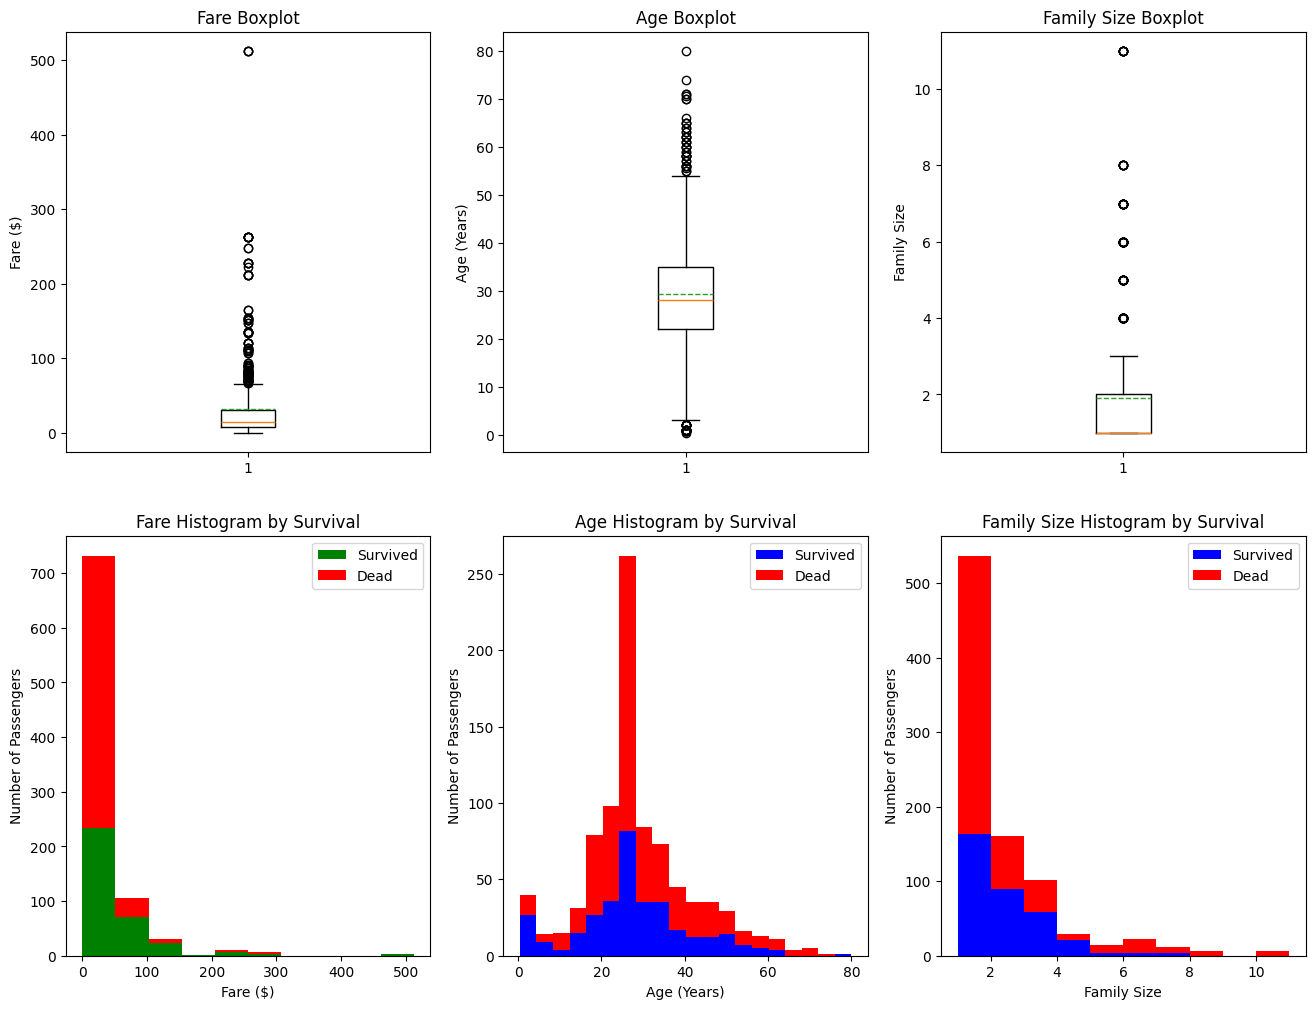

In [ ]:
import matplotlib.pyplot as plt

if 'FamilySize' not in data1.columns:
    data1['FamilySize'] = data1['SibSp'] + data1['Parch'] + 1

data1['Age'].fillna(data1['Age'].median(), inplace=True)  # Isi NaN dengan median

# Set ukuran figure
plt.figure(figsize=(16, 12))

# Subplot pertama (2 baris, 3 kolom, plot ke-1)
plt.subplot(231)

# Membuat boxplot untuk kolom 'Fare' dari dataset 'datal'
plt.boxplot(x=data1['Fare'], showmeans=True, meanline=True)

# Menambahkan judul dan label
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

# Subplot kedua (2 baris, 3 kolom, plot ke-2) - Boxplot Age
plt.subplot(232)
plt.boxplot(data1['Age'], showmeans=True, meanline=True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

# Subplot ketiga (2 baris, 3 kolom, plot ke-3) - Boxplot FamilySize
plt.subplot(233)
plt.boxplot(data1['FamilySize'], showmeans=True, meanline=True)
plt.title('Family Size Boxplot')
plt.ylabel('Family Size')

# Subplot ke-4 (Fare Histogram berdasarkan Survival)
plt.subplot(234)
plt.hist(
    [data1[data1['Survived'] == 1]['Fare'], data1[data1['Survived'] == 0]['Fare']],
    stacked=True, color=['g', 'r'], label=['Survived', 'Dead']
)
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('Number of Passengers')
plt.legend()

# Subplot ke-5 (Age Histogram berdasarkan Survival)
plt.subplot(235)
plt.hist(
    [data1[data1['Survived'] == 1]['Age'], data1[data1['Survived'] == 0]['Age']],
    bins=20, stacked=True, color=['blue', 'red'], label=['Survived', 'Dead']
)
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('Number of Passengers')
plt.legend()

# Subplot ke-6 (Family Size Histogram berdasarkan Survival)
plt.subplot(236)
plt.hist(
    [data1[data1['Survived'] == 1]['FamilySize'], data1[data1['Survived'] == 0]['FamilySize']],
    bins=10, stacked=True, color=['blue', 'red'], label=['Survived', 'Dead']
)
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size')
plt.ylabel('Number of Passengers')
plt.legend()

# Menampilkan plot
plt.show()

<Axes: xlabel='AgeBin', ylabel='Survived'>

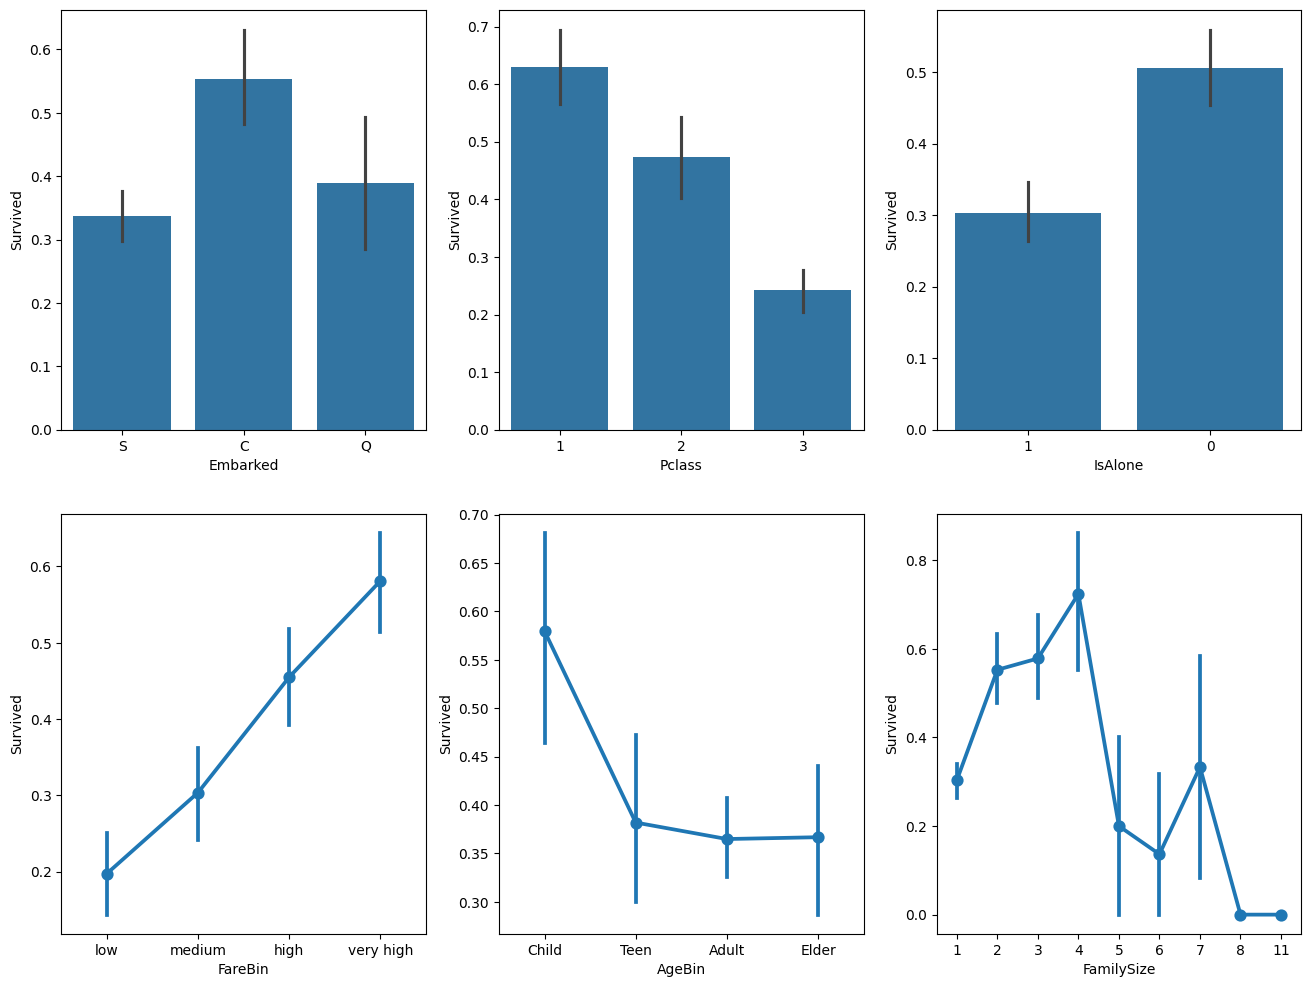

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# membuat kolom familysize
if 'FamilySize' not in data1.columns:
    data1['FamilySize'] = data1['SibSp'] + data1['Parch'] + 1

# membuat kolom IsAlone
data1['IsAlone'] = 0
data1.loc[data1['FamilySize'] == 1, 'IsAlone'] = 1

# Buat figure dengan subplots
fig, saxis = plt.subplots(2, 3, figsize=(16, 12))

# Plot dengan seaborn
sns.barplot(x='Embarked', y='Survived', data=data1, ax=saxis[0, 0])
sns.barplot(x='Pclass', y='Survived', order=[1,2,3], data=data1, ax=saxis[0, 1])
sns.barplot(x='IsAlone', y='Survived', order=[1,0], data=data1, ax=saxis[0, 2])  # IsAlone sudah dibuat!
sns.pointplot(x='FamilySize', y='Survived', data=data1, ax=saxis[1, 2])
sns.pointplot(x='FareBin', y='Survived', data=data1, ax=saxis[1, 0])
sns.pointplot(x='AgeBin', y='Survived', data=data1, ax=saxis[1, 1])



Text(0.5, 1.0, 'Perbandingan survival Pclass vs FamilySize')

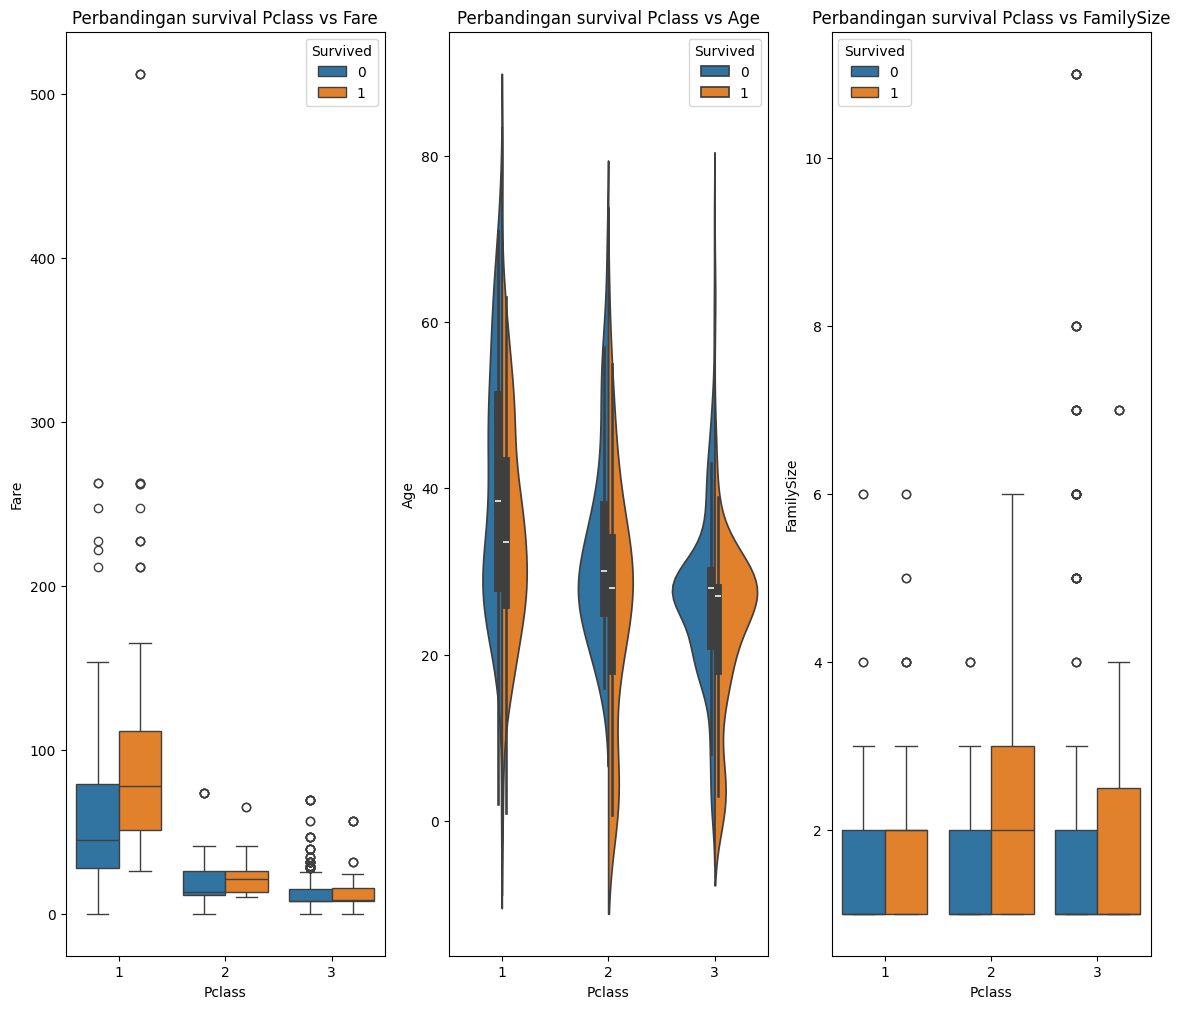

In [ ]:
#grafik distribusi dari data kualitatif : Pclass
#Pclass cukup tinggi korelasinya dgn survival, berikut akan ditunjukan perbandingan Pclass dgn beberapa another feature
if 'FamilySize' not in data1.columns:
    data1['FamilySize'] = data1['SibSp'] + data1['Parch'] + 1

fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(14, 12))
sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data=data1, ax=axis1)
axis1.set_title('Perbandingan survival Pclass vs Fare')
sns.violinplot(x='Pclass', y= 'Age', hue='Survived', data=data1, split = True, ax=axis2)
axis2.set_title('Perbandingan survival Pclass vs Age')
sns.boxplot(x='Pclass', y='FamilySize', hue='Survived', data=data1, ax=axis3)
axis3.set_title('Perbandingan survival Pclass vs FamilySize')

Text(0.5, 1.0, 'Perbandingan survival Pclass vs IsAlone')

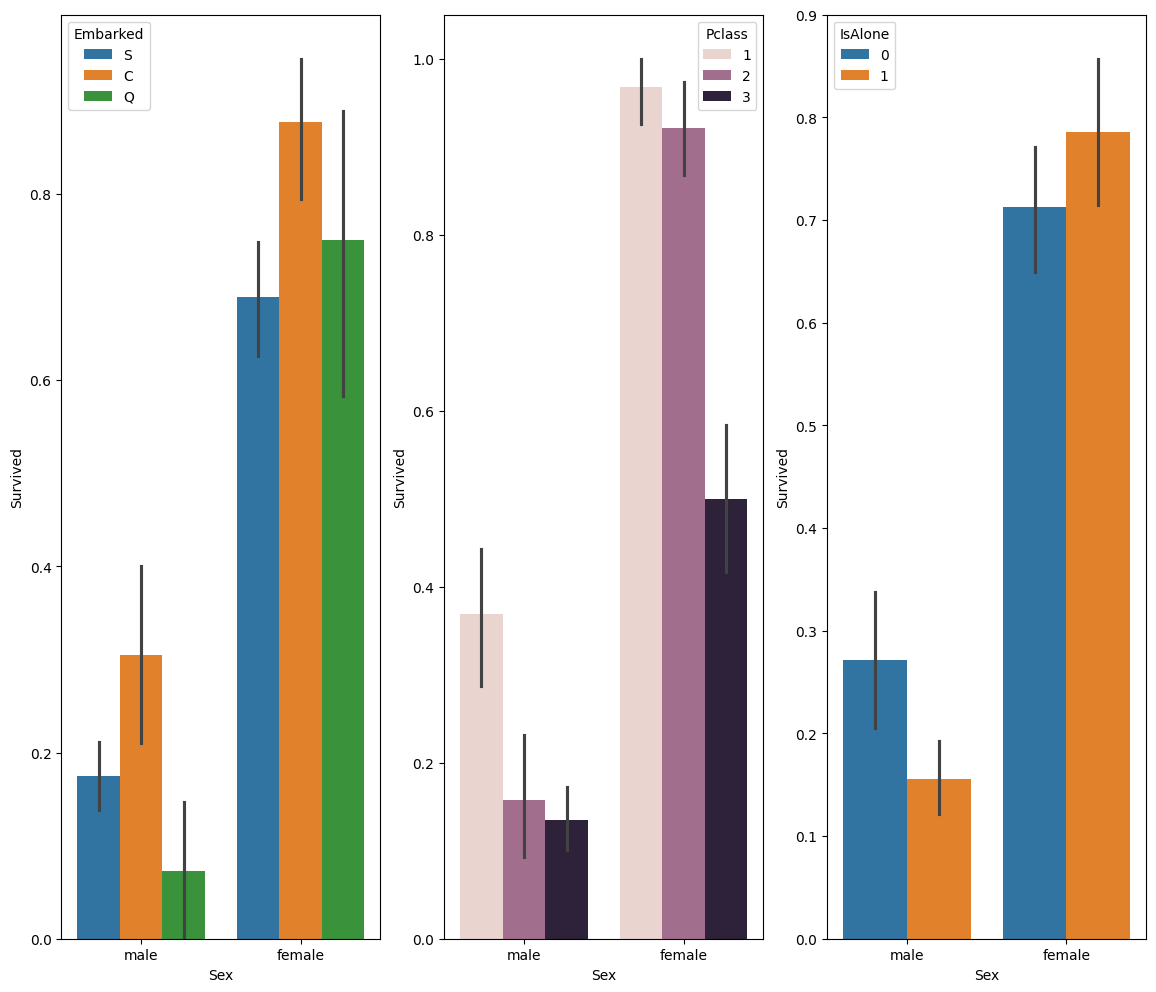

In [ ]:
#grafik distribusi dari data kualitatif : sex
#sex cukup tinggi korelasinya dgn survival berikut akan ditunjukkan perbandingan sex dgn beberapa feature lain

# membuat kolom familysize
if 'FamilySize' not in data1.columns:
    data1['FamilySize'] = data1['SibSp'] + data1['Parch'] + 1

# membuat kolom IsAlone
data1['IsAlone'] = 0
data1.loc[data1['FamilySize'] == 1, 'IsAlone'] = 1

fig, qaxis = plt.subplots(1, 3, figsize=(14, 12))
sns.barplot(x = 'Sex', y = 'Survived', hue = 'Embarked', data=data1, ax = qaxis[0])
axis1.set_title('Perbandingan survival Sex vs Embarked')
sns.barplot(x = 'Sex', y = 'Survived', hue = 'Pclass', data=data1, ax = qaxis[1])
axis2.set_title('Perbandingan survival Pclass vs Pclass')
sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', data=data1, ax = qaxis[2])
axis3.set_title('Perbandingan survival Pclass vs IsAlone')

<Axes: xlabel='Pclass', ylabel='Survived'>

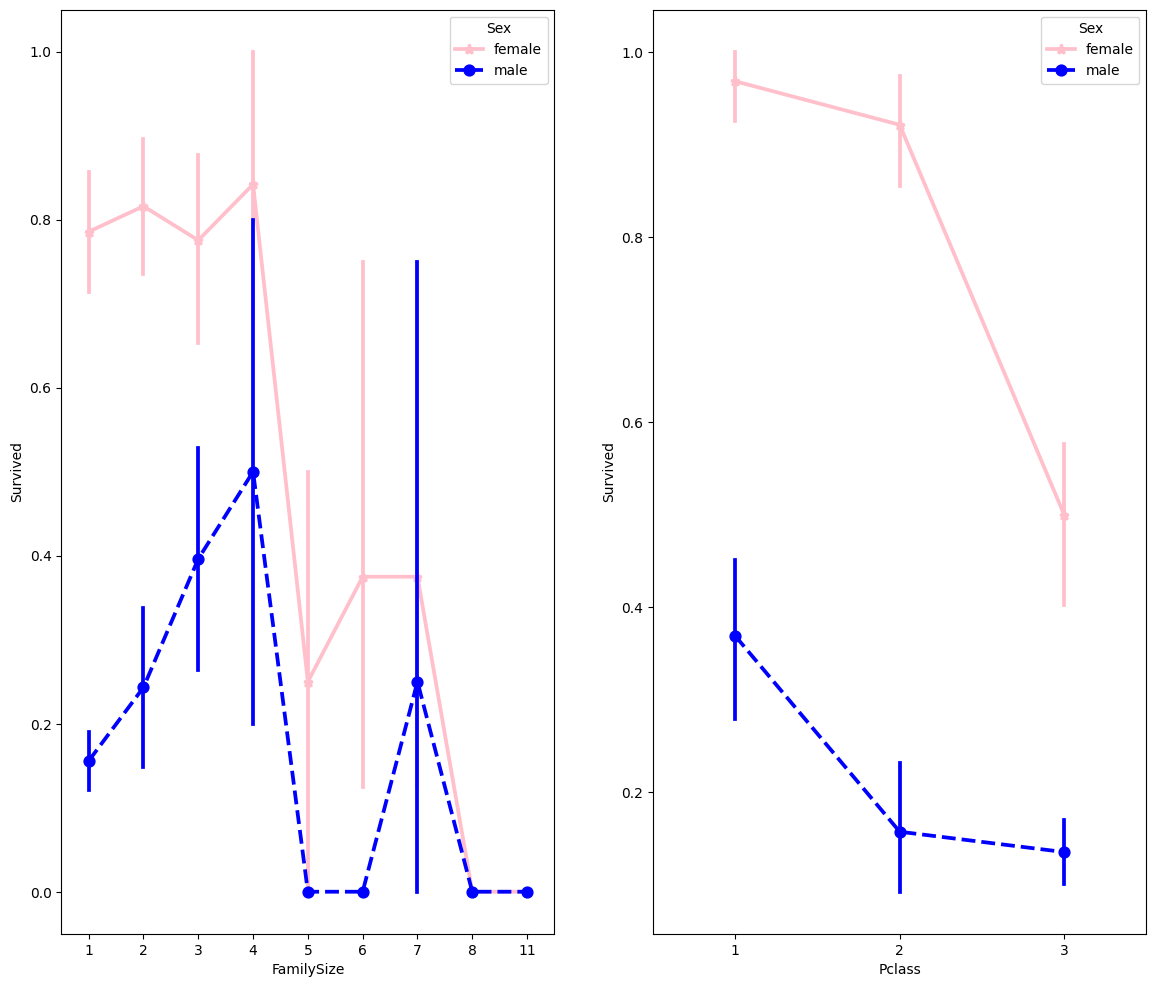

In [ ]:
# membuat kolom familysize
if 'FamilySize' not in data1.columns:
    data1['FamilySize'] = data1['SibSp'] + data1['Parch'] + 1

#contoh grafik perbandingan lainnya
fig, (maxis1, maxis2) = plt.subplots(1, 2, figsize=(14, 12))

#bagaimana pengaruh faktor ukuran keluarga terhadap perbandingan jenis kelamin dan survival
sns.pointplot(x = 'FamilySize', y = 'Survived', hue = 'Sex', data=data1,
              palette={"male":"blue","female":"pink"},markers=["*","o"],
              linestyles=["-","--"], ax = maxis1)

#bagaimana pengaruh faktor class terhadap perbandingan jenis kelamin dan survival
sns.pointplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data=data1,
              palette={"male":"blue","female":"pink"},markers=["*","o"],
              linestyles=["-","--"], ax = maxis2)

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


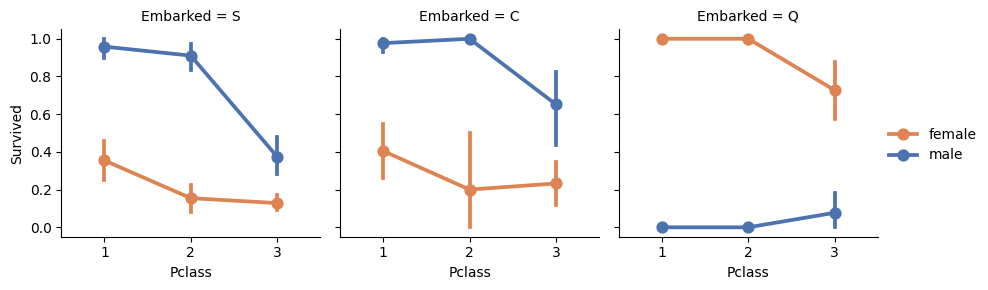

In [ ]:
#bagaimana pengaruh faktor port keberangkatan terhadap perbandingan Pclass, sex, dan survival
#facegrid: https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
e = sns.FacetGrid(data1, col='Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
e.add_legend()
#

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


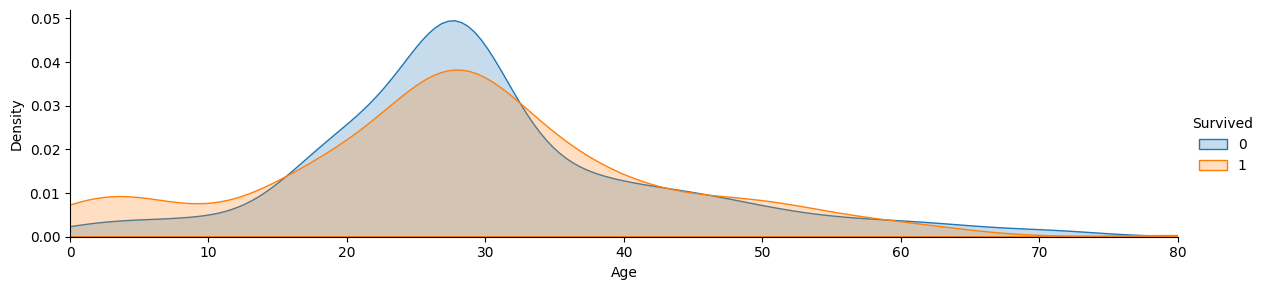

In [ ]:
#plot distribusi dari usia penumpang yg selamat/ tidak selamat
a = sns.FacetGrid(data1, hue='Survived',aspect=4)
a.map(sns.kdeplot, 'Age', shade=True)
a.set(xlim=(0, data1['Age'].max()))
a.add_legend()

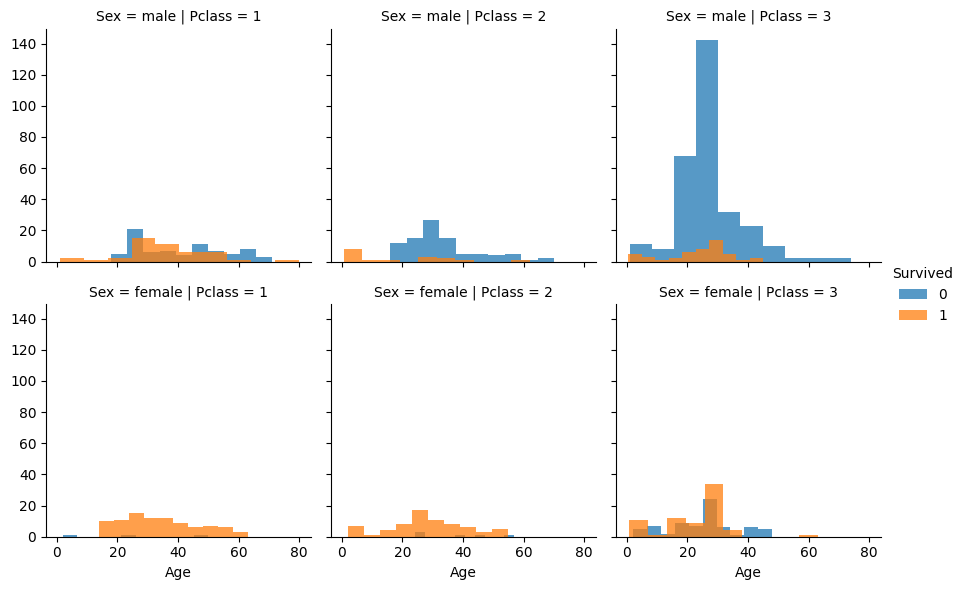

In [ ]:
#perbandingan histogram dari sex, class, dan age dgn survival
h = sns.FacetGrid(data1, row='Sex', col='Pclass', hue='Survived')
h.map(plt.hist, 'Age', alpha=.75)
h.add_legend();

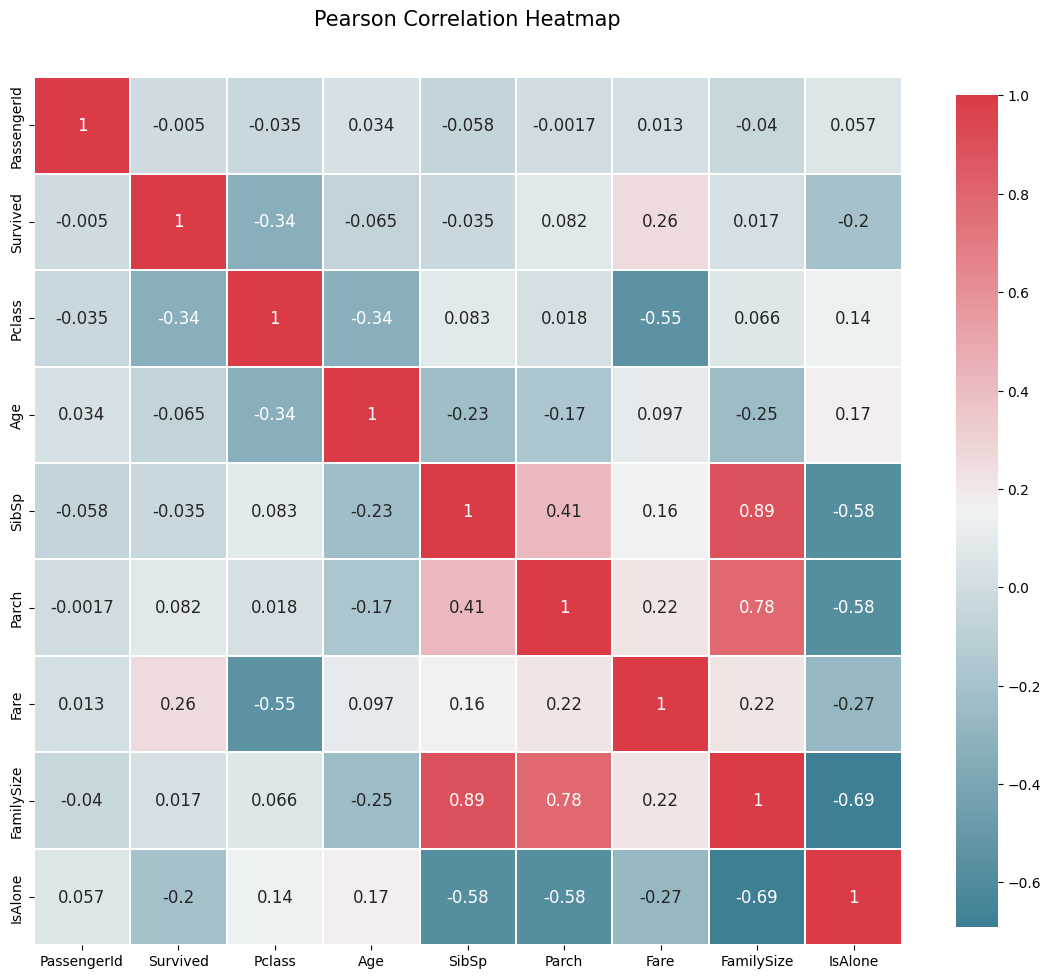

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def correlation_heatmap(df):
    # Membuat figure dan axis dengan ukuran yang sesuai
    fig, ax = plt.subplots(figsize=(14, 12))

    # Membuat colormap
    colormap = sns.diverging_palette(220, 10, as_cmap=True)

    # Hanya memilih fitur numerik saja
    numerical_df = df.select_dtypes(include=['number'])

    # Membuat heatmap dengan seaborn
    sns.heatmap(numerical_df.corr(), cmap=colormap, square=True,
                annot=True, linewidths=0.1, vmax=1.0,
                linecolor='white', cbar_kws={'shrink': 0.9}, ax=ax,
                annot_kws={'fontsize': 12})

    # Menambahkan judul
    plt.title('Pearson Correlation Heatmap', y=1.05, size=15)

    # Menampilkan plot
    plt.show()

# Contoh pemanggilan fungsi
correlation_heatmap(data1)


In [5]:
# Exercise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  # Fixed typo here
from sklearn import model_selection
from google.colab import drive

# Mount Google Drive to read CSV files
drive.mount('/content/drive')
# To read local CSV files
data_raw = pd.read_csv('/content/drive/MyDrive/Data Mining/diabetes.csv', delimiter=',')

# Create a deep copy of data_raw
data1 = data_raw.copy(deep=True)

# Check for missing values in each column for both train and test data
print('Diabetes data columns with NULL values: \n')

cols_with_possible_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_possible_zeros:
    zero_count = (data1[col] == 0).sum()
    print(f'{col} has {zero_count} zero values')

# Display descriptive statistics
data1.describe(include='all')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Diabetes data columns with NULL values: 

Glucose has 5 zero values
BloodPressure has 35 zero values
SkinThickness has 227 zero values
Insulin has 374 zero values
BMI has 11 zero values


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  # Fixed typo here
from sklearn import model_selection
from google.colab import drive

# Mount Google Drive to read CSV files
drive.mount('/content/drive')

# To read local CSV files
data_raw = pd.read_csv('/content/drive/MyDrive/Data Mining/diabetes.csv', delimiter=',')

# Create a deep copy of data_raw
data1 = data_raw.copy(deep=True)
data_cleaner = [data1]

for dataset in data_cleaner:

    #fill in the blank glucose with median (isikan GLUCOSE yg kosong dgn median)
  dataset['Glucose'].fillna(dataset['Glucose'].median())

   #fill in the blank age with median (isikan age yg kosong dgn median)
  dataset['Age'].fillna(dataset['Age'].median())


  #fill in the blank bmi with modus(isikan bmi yg kosong dgn modus)
  dataset['BMI'].fillna(dataset['BMI'].mode()[0])

  #remove cabin and other attributes that we deem unnecessary (hapus atribut cabin dan lainnya yang kita anggep tidak diperlukan)
  drop_column=['SkinThickness', 'Pregnancies', 'Insulin']

  #removes the columns from the data1 DataFrame that are listed in the drop_column list (hapus kolom dari data1 DataFrame)
  dataset.drop(drop_column, axis=1, inplace=True)

  # the count of missing values (NaNs) for each column in the data1 DataFrame(perhitungan di bawah utk mengisi nilai kosong dari tiap kolom di data1DataFrame)
print('Diabetes data columns with NULL values:')
print(data1.isnull().sum())
print("-"*10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Diabetes data columns with NULL values:
Glucose                     0
BloodPressure               0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
----------
     Glucose  BloodPressure   BMI  DiabetesPedigreeFunction  Age  Outcome  \
127      118             58  33.3                     0.261   23        0   
241       91             70  33.1                     0.446   22        0   
262       95             70  32.1                     0.612   24        0   
613      105             80  32.5                     0.878   26        0   
280      146             70  37.9                     0.334   28        1   
25       125             70  31.1                     0.205   41        1   
82        83             78  29.3                     0.767   36        0   
181      11

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import model_selection
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Read CSV
data_raw = pd.read_csv('/content/drive/MyDrive/Data Mining/diabetes.csv', delimiter=',')

# Deep copy
data1 = data_raw.copy(deep=True)
data_cleaner = [data1]

for dataset in data_cleaner:
    # Isi nilai kosong
    dataset['Glucose'] = dataset['Glucose'].fillna(dataset['Glucose'].median())
    dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())
    dataset['Insulin'] = dataset['Insulin'].fillna(dataset['Insulin'].mode()[0])
    dataset['BMI'] = dataset['BMI'].fillna(dataset['BMI'].mode()[0])

    # Hapus kolom yang tidak diperlukan
    drop_column = ['SkinThickness', 'Pregnancies', 'Insulin']  # jika tetap ingin dihapus
    dataset.drop(drop_column, axis=1, inplace=True)

    # Buat kolom age group
    bins = [20, 30, 40, 50, 60, 70, 100]
    labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70+']
    dataset['Age_Group'] = pd.cut(dataset['Age'], bins=bins, labels=labels)

# Tampilkan 10 sampel acak
print(dataset.sample(10))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     Glucose  BloodPressure   BMI  DiabetesPedigreeFunction  Age  Outcome  \
586      143             66  34.9                     0.129   41        1   
444      117             62  29.7                     0.380   30        1   
744      153             88  40.6                     1.174   39        0   
473      136             90  29.9                     0.210   50        0   
240       91             64  29.2                     0.192   21        0   
249      111             86  30.1                     0.143   23        0   
164      131             88  31.6                     0.743   32        1   
338      152             78  34.2                     0.893   33        1   
485      135             68  42.3                     0.365   24        1   
261      141              0  30.0                     0.761   27        1   

    Age_Group  
586    

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
correlation between Attribute in diabetes dataset with outcome :
Glucose                     0.466581
BloodPressure               0.065068
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64


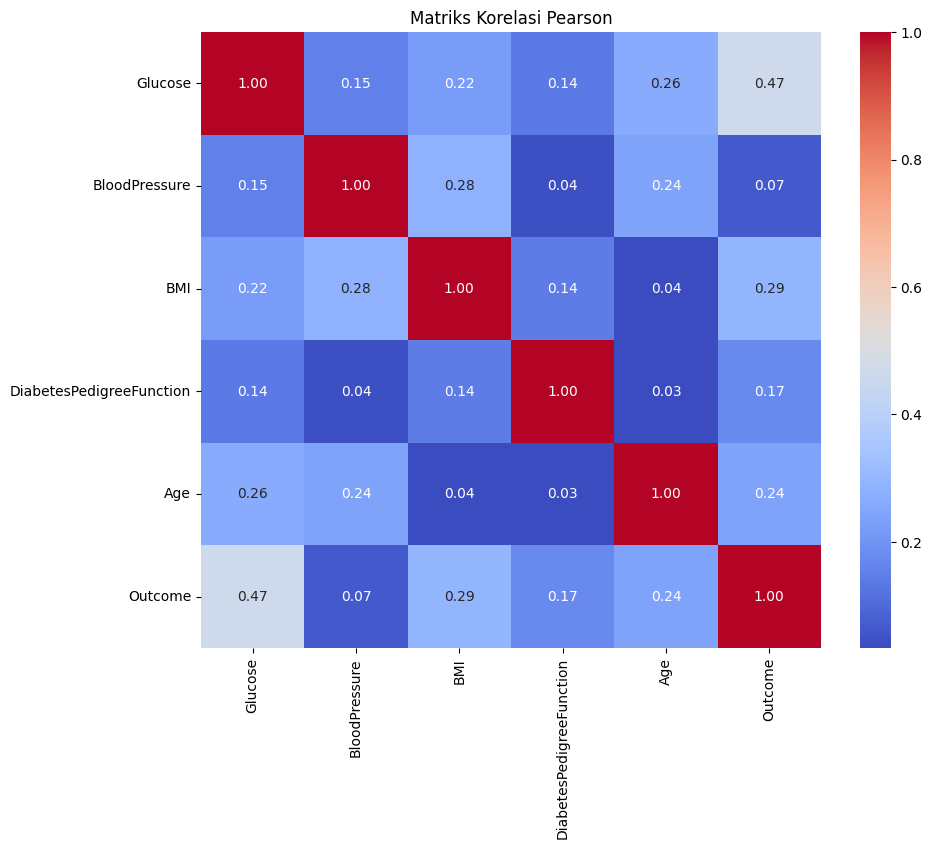

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive to read CSV files
drive.mount('/content/drive')

# To read local CSV files
data_raw = pd.read_csv('/content/drive/MyDrive/Data Mining/diabetes.csv', delimiter=',')

# Create a deep copy of data_raw
data1 = data_raw.copy(deep=True)
data_cleaner = [data1]

# Ensure 'Title' column exists
for dataset in data_cleaner:
      #fill in the blank glucose with median (isikan GLUCOSE yg kosong dgn median)
  dataset['Glucose'].fillna(dataset['Glucose'].median())

   #fill in the blank age with median (isikan age yg kosong dgn median)
  dataset['Age'].fillna(dataset['Age'].median())


  #fill in the blank bmi with modus(isikan bmi yg kosong dgn modus)
  dataset['BMI'].fillna(dataset['BMI'].mode()[0])

  #remove cabin and other attributes that we deem unnecessary (hapus atribut cabin dan lainnya yang kita anggep tidak diperlukan)
  drop_column=['SkinThickness', 'Pregnancies', 'Insulin']

  #removes the columns from the data1 DataFrame that are listed in the drop_column list (hapus kolom dari data1 DataFrame)
  dataset.drop(drop_column, axis=1, inplace=True)

  correlation = data1.corr()
  print('correlation between Attribute in diabetes dataset with outcome :')

# identify kind attribute to compare with another attribute column
  print(correlation['Outcome'])

  plt.figure(figsize=(10, 8))
  sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
  plt.title('Matriks Korelasi Pearson')
  plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


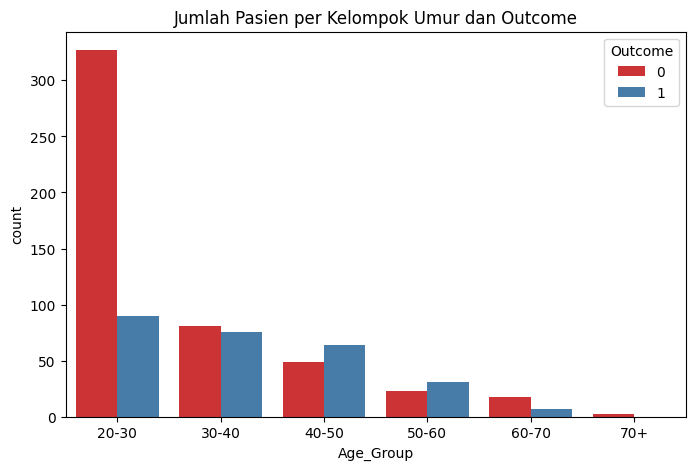

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import model_selection
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Read CSV
data_raw = pd.read_csv('/content/drive/MyDrive/Data Mining/diabetes.csv', delimiter=',')

# Deep copy
data1 = data_raw.copy(deep=True)
data_cleaner = [data1]

for dataset in data_cleaner:
    # Isi nilai kosong
    dataset['Glucose'] = dataset['Glucose'].fillna(dataset['Glucose'].median())
    dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())
    dataset['BMI'] = dataset['BMI'].fillna(dataset['BMI'].mode()[0])

    # Hapus kolom yang tidak diperlukan
    drop_column = ['SkinThickness', 'Pregnancies', 'Insulin']  # jika tetap ingin dihapus
    dataset.drop(drop_column, axis=1, inplace=True)

    # Buat kolom age group
    bins = [20, 30, 40, 50, 60, 70, 100]
    labels = ['20-30', '30-40', '40-50', '50-60', '60-70', '70+']
    dataset['Age_Group'] = pd.cut(dataset['Age'], bins=bins, labels=labels)

    plt.figure(figsize=(8,5))
    sns.countplot(x='Age_Group', hue='Outcome', data=data1, palette='Set1')
    plt.title('Jumlah Pasien per Kelompok Umur dan Outcome')
    plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-52-608ad9aaf5e2>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='BMI', data=data1, palette='Set2')


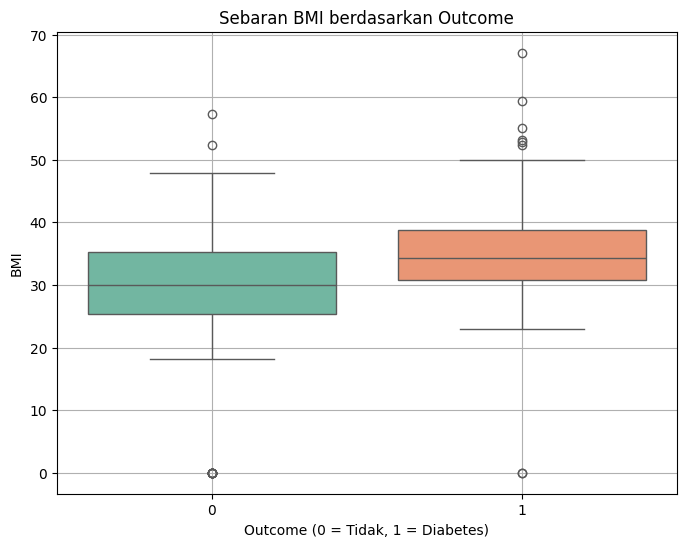

<ipython-input-52-608ad9aaf5e2>:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Glucose', data=data1, palette='Set2')


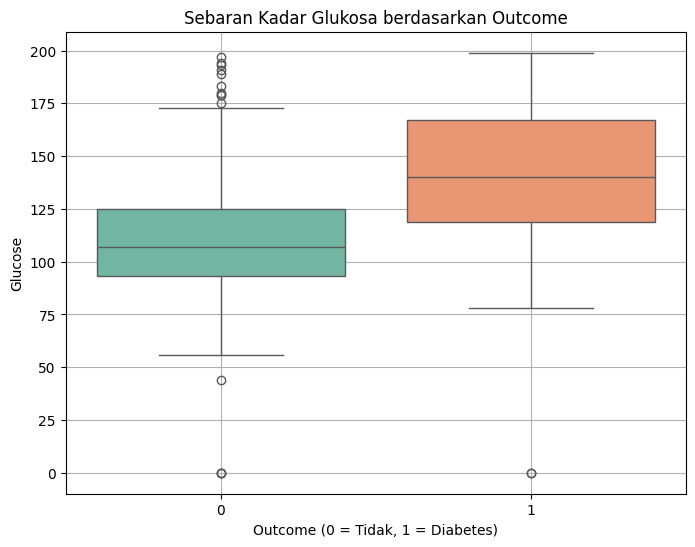

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import model_selection
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Read CSV
data_raw = pd.read_csv('/content/drive/MyDrive/Data Mining/diabetes.csv', delimiter=',')

# Deep copy
data1 = data_raw.copy(deep=True)
data_cleaner = [data1]

for dataset in data_cleaner:
    # Isi nilai kosong
    dataset['Glucose'] = dataset['Glucose'].fillna(dataset['Glucose'].median())
    dataset['Age'] = dataset['Age'].fillna(dataset['Age'].median())
    dataset['BMI'] = dataset['BMI'].fillna(dataset['BMI'].mode()[0])

    # Hapus kolom yang tidak diperlukan
    drop_column = ['SkinThickness', 'Pregnancies', 'Insulin']  # jika tetap ingin dihapus
    dataset.drop(drop_column, axis=1, inplace=True)

    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Outcome', y='BMI', data=data1, palette='Set2')
    plt.title('Sebaran BMI berdasarkan Outcome')
    plt.xlabel('Outcome (0 = Tidak, 1 = Diabetes)')
    plt.ylabel('BMI')
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Outcome', y='Glucose', data=data1, palette='Set2')
    plt.title('Sebaran Kadar Glukosa berdasarkan Outcome')
    plt.xlabel('Outcome (0 = Tidak, 1 = Diabetes)')
    plt.ylabel('Glucose')
    plt.grid(True)
    plt.show()
